### Rotation of horizontal velocities from EM-APEX floats to along-track and cross-track

In [25]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cmocean
import datetime
import math
import gsw
import stat
import scipy
import pyproj
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.rcParams['font.size'] = '14'

In [ ]:
workingdir = r'C:\Users\mijakes\checkouts\phd-public'
os.chdir(workingdir) 

In [2]:
import imp
import src.importData as imports
import src.calc as calc
import src.plots as plots
import src.velocities as vel
import src.concat as ct
import src.interpolation as interp
import src.settings as settings
import src.stats as stats

In [3]:
# import float data
floatids = [8489, 8492, 8493]
ema = imports.importFloatData(floatids)

# import satellite data
datadir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data')
alt_cmems = imports.importNetCDF(datadir, 'CMEMS.nc', datatype ='altimetry')

In [ ]:
# path to save figures
my_path = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd','figures', 'chapter1_manuscript') # 'revision_figures'

### Create and save new rotated velocity dataset (before half-inertial pair averaging)

In [4]:
# floatid = 8489
# float_num = ema[floatid]

In [5]:
# imp.reload(vel)
# imp.reload(calc)
# rot_vel = vel.createRotVelDataset(float_num, floatid, abs_vels_prof[floatid].u_abs, 
#                                   abs_vels_prof[floatid].v_abs, ctd_time[floatid], by_dist = True, save_file = True)

### Import datasets

In [6]:
abs_vels = {}
rot_vels = {}
ctd_time = {}

datadir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data', 'floats')
                       
for floatid in floatids:
    #absolute velocities
    file = os.path.join(datadir, 'absolute_velocity', 'by_profile', 'abs_vel_%s_extra_qc.nc' %floatid)
    abs_vels[floatid] = xr.open_dataset(file)
    
    #rotated velocities
    file = os.path.join(datadir, 'rotated_velocity', 'by_profile', 'rot_vel_%s.nc' %floatid)
    rot_vels[floatid] = xr.open_dataset(file)
    
    # time recorded from float ctd
    file = os.path.join(datadir, 'extra_vars', 'macquarie_ema-%s_qc.nc' %floatid)
    ctd_time[floatid] = xr.open_dataset(file).ctd_t

### Create new half-inertial pair averaged dataset 

In [7]:
# floatid = 8493
# float_num = ema[floatid]

In [8]:
# # create new half-inertial pair averaged dataset 
# imp.reload(settings)
# savedir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data', 'floats')
# no_inert = settings.create_sub_inertial_ds(float_num, floatid, abs_vels[floatid], rot_vels[floatid], ctd_time[floatid], savedir)

### Import half-inertial pair averaged dataset

In [9]:
imp.reload(imports)
ds = imports.sub_inertial_ds(ema, floatids, datadir, xdim = 'profile')
ds_dist = imports.sub_inertial_ds(ema, floatids, datadir, xdim = 'distance', rot_vels = rot_vels)

In [10]:
floatid = 8492
float_num = ema[floatid]
rs = calc.findRSperiod(float_num)

Text(0, 0.5, 'pressure (dbar)')

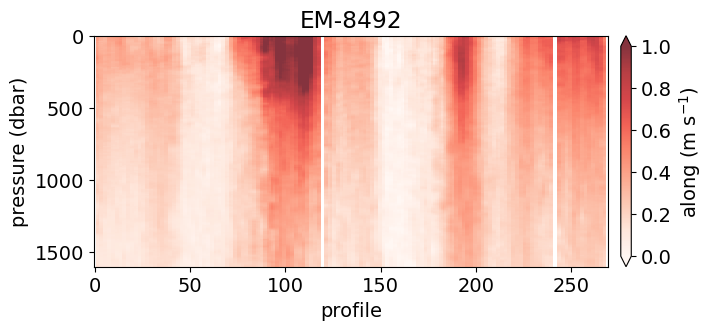

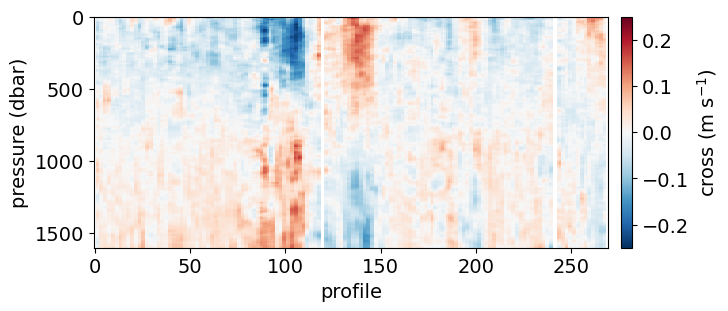

In [12]:
fig, ax = plt.subplots(figsize = (8, 3))
ds[floatid].u_rot.plot(x = 'profile', vmin = 0, vmax = 1, cmap = 'Reds', alpha = 0.8,
                       cbar_kwargs = dict(label = 'along (m s$^{-1}$)', pad = 0.02))
ax.invert_yaxis()
plt.xlabel('profile')
plt.ylabel('pressure (dbar)')
plt.title(f'EM-{floatid}')

# settings.save_figure(fig, my_path, 'along_no_inertial.png', dpi = 600, pad = 0.2)

fig, ax = plt.subplots(figsize = (8, 3))
ds[floatid].v_rot.plot(x = 'profile', vmin = -0.25, vmax = 0.25, cmap = 'RdBu_r', 
                       cbar_kwargs = dict(label = 'cross (m s$^{-1}$)', pad = 0.02))
ax.invert_yaxis()
plt.xlabel('profile')
plt.ylabel('pressure (dbar)')

# settings.save_figure(fig, my_path, 'cross_no_inertial.png', dpi = 600, pad = 0.2)

Text(0, 0.5, 'pressure (dbar)')

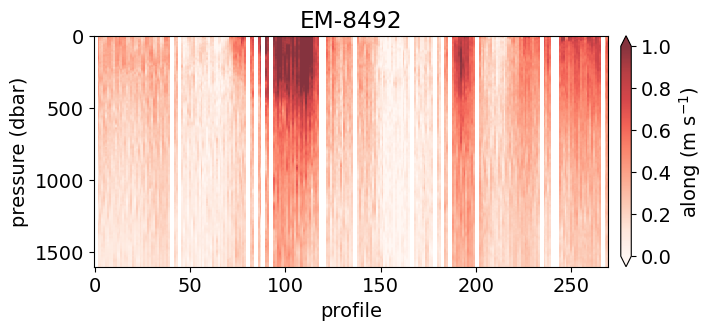

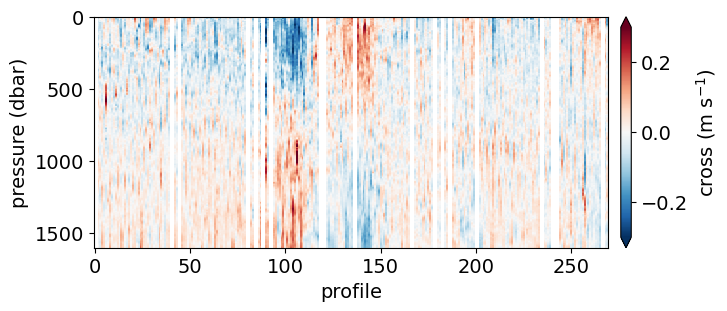

In [13]:
fig, ax = plt.subplots(figsize = (8, 3))
rot_vels[floatid].u_rot.plot(x = 'profile', vmin = 0, vmax = 1, cmap = 'Reds', alpha = 0.8,
                             cbar_kwargs = dict(label = 'along (m s$^{-1}$)', pad = 0.02))
ax.invert_yaxis()
plt.xlabel('profile')
plt.title(f'EM-{floatid}')
plt.ylabel('pressure (dbar)')

# settings.save_figure(fig, my_path, 'along.png', dpi = 600, pad = 0.2)

fig, ax = plt.subplots(figsize = (8, 3))
rot_vels[floatid].v_rot.plot(x = 'profile', vmin = -0.3, vmax = 0.3, cmap = 'RdBu_r', 
                             cbar_kwargs = dict(label = 'cross (m s$^{-1}$)', pad = 0.02))
ax.invert_yaxis()
plt.xlabel('profile')
plt.ylabel('pressure (dbar)')

# settings.save_figure(fig, my_path, 'cross.png', dpi = 600, pad = 0.2)

In [14]:
dist_interval = 3
u_even_d = interp.even_dist_grid(ds_dist[floatid].u_rot, dist_interval)
v_even_d = interp.even_dist_grid(ds_dist[floatid].v_rot, dist_interval)

Text(0, 0.5, 'pressure (dbar)')

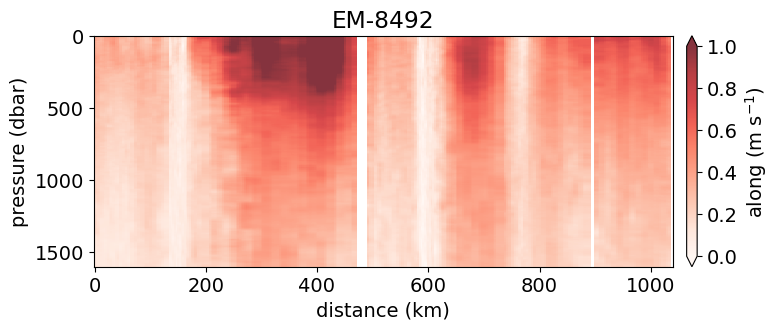

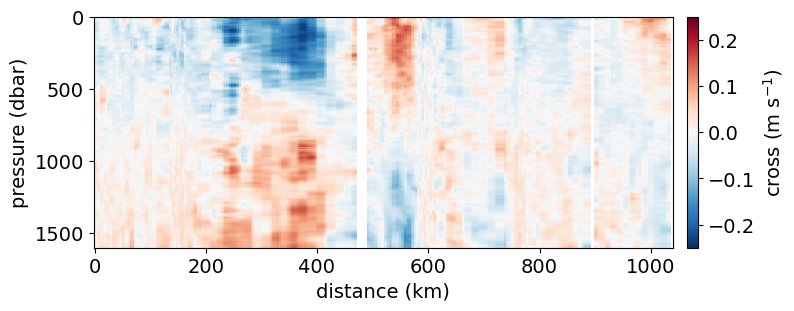

In [15]:
fig, ax = plt.subplots(figsize = (9, 3))
u_even_d.plot(x = 'distance', vmin = 0, vmax = 1, cmap = 'Reds', alpha = 0.8,
              cbar_kwargs = dict(label = 'along (m s$^{-1}$)', pad = 0.02))
ax.invert_yaxis()
plt.xlabel('distance (km)')
plt.title(f'EM-{floatid}')
plt.ylabel('pressure (dbar)')

# settings.save_figure(fig, my_path, 'along_even_dist.png', dpi = 600, pad = 0.2)

fig, ax = plt.subplots(figsize = (9, 3))
v_even_d.plot(x = 'distance', vmin = -0.25, vmax = 0.25, cmap = 'RdBu_r', 
              cbar_kwargs = dict(label = 'cross (m s$^{-1}$)', pad = 0.02))
ax.invert_yaxis()
plt.xlabel('distance (km)')
plt.ylabel('pressure (dbar)')

# settings.save_figure(fig, my_path, 'cross_even_dist.png', dpi = 600, pad = 0.2)

### Concatenated floats

In [16]:
CT, SA = {}, {}
mld = {}

imp.reload(calc)
for floatid in floatids:
    # sub-inertial temperature and salinity
    CT[floatid], SA[floatid] = ds_dist[floatid].CT, ds_dist[floatid].SA
    mld[floatid] = calc.MLD_float(ds_dist[floatid], floatid, plot = False)
    
mld_on_p, end_dist, d_rs = ct.concatenated_flts(mld, floatids, new_dim = True)

In [17]:
# potential density density
imp.reload(ct)

S_concat, end_dist, d_rs = ct.concatenated_flts(SA, floatids, interp_to_dens = False, new_dim = True)
T_concat, end_dist, d_rs = ct.concatenated_flts(CT, floatids, interp_to_dens = False, new_dim = True)
pdens = calc.potentialDensity(S_concat.pressure, S_concat, T_concat)
levels = np.arange(26.8,27.8,0.1)

### Rotated velocities

In [18]:
u_rot = {}
v_rot = {}
u_rot_prof = {}
v_rot_prof = {}
for floatid in floatids:
    u_rot[floatid] = ds_dist[floatid].u_rot
    v_rot[floatid] = ds_dist[floatid].v_rot
    
    u_rot_prof[floatid] = ds[floatid].u_rot
    v_rot_prof[floatid] = ds[floatid].v_rot
    
urot_ds, end_dist, u_dict = ct.concatenated_flts(u_rot, floatids, interp_to_dens = False, new_dim = True)
vrot_ds, end_dist, v_dict = ct.concatenated_flts(v_rot, floatids, interp_to_dens = False, new_dim = True)
ticks, values, flt_dist_loc = plots.concatTickValues(u_dict)

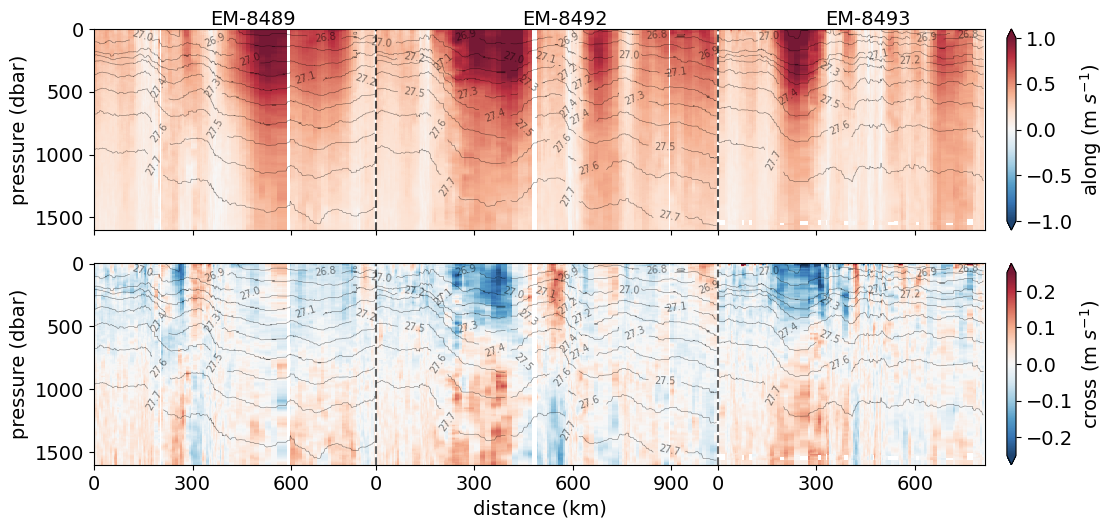

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (12,5.5))

#along-trajectory
im1 = urot_ds.plot(ax = ax1, x = 'distance', cmap = 'RdBu_r', vmin = -1, vmax = 1, alpha = 0.9, extend = 'both',
                                            cbar_kwargs={"label": "along (m $s^{-1}$)", 'pad':0.02})

for i in range(0,len(flt_dist_loc)):
    ax1.axvline(x = flt_dist_loc[i], linestyle = '--', color = 'k', alpha = 0.7)
    ax2.axvline(x = flt_dist_loc[i], linestyle = '--', color = 'k', alpha = 0.6)
    
ax1.set_xticks(ticks)
ax1.set_xticklabels(values)

CS = pdens.plot.contour(ax = ax1, x = 'distance', colors = 'k', linewidths = 0.4, linestyles = 'solid', 
                                                                levels = levels, alpha = 0.5)
plt.clabel(CS, inline=True, fontsize=7, fmt = '%1.1f')


#cross-trajectory
im2 = vrot_ds.plot(ax = ax2, x = 'distance', cmap = 'RdBu_r', vmin = -0.25, vmax = 0.25, alpha = 0.9, extend = 'both',
                                            cbar_kwargs={"label": "cross (m $s^{-1}$)", 'pad':0.02})

CS = pdens.plot.contour(ax = ax2, x = 'distance', colors = 'k', linewidths = 0.4, linestyles = 'solid', 
                                                                    levels = levels, alpha = 0.5)
plt.clabel(CS, inline=True, fontsize=7, fmt = '%1.1f')

ax1.invert_yaxis()
ax1.set_ylabel('pressure (dbar)')
ax1.set_xlabel('')
ax2.set_ylabel('pressure (dbar)')
ax2.set_xlabel('distance (km)')

ax1.text(0.13, 1.02, 'EM-8489', transform = ax1.transAxes)
ax1.text(0.48, 1.02, 'EM-8492', transform = ax1.transAxes)
ax1.text(0.82, 1.02, 'EM-8493', transform = ax1.transAxes)

plt.tight_layout()
plt.show()

### Evenely gridded in distance (3 km intervals) and smoothed using a centered rolling average of 9 km.

In [20]:
imp.reload(interp)
T_even_concat, T_smooth_concat, T_smooth, T_even_dist = interp.grid_and_smooth(CT, floatids)
S_even_concat, S_smooth_concat, S_smooth, S_even_dist = interp.grid_and_smooth(SA, floatids)
pdens = calc.potentialDensity(S_even_concat.pressure, S_even_concat, T_even_concat)
mld_on_p = calc.MLD(pdens, criteria = 0.05, pref = 10)

In [21]:
u_even_concat, u_smooth_concat, u_smooth, u_even_dist = interp.grid_and_smooth(u_rot, floatids)
v_even_concat, v_smooth_concat, v_smooth, v_even_dist = interp.grid_and_smooth(v_rot, floatids)

In [22]:
levels = np.arange(26.9,27.9,0.2)

Text(0.8, 1.02, 'EM-8493')

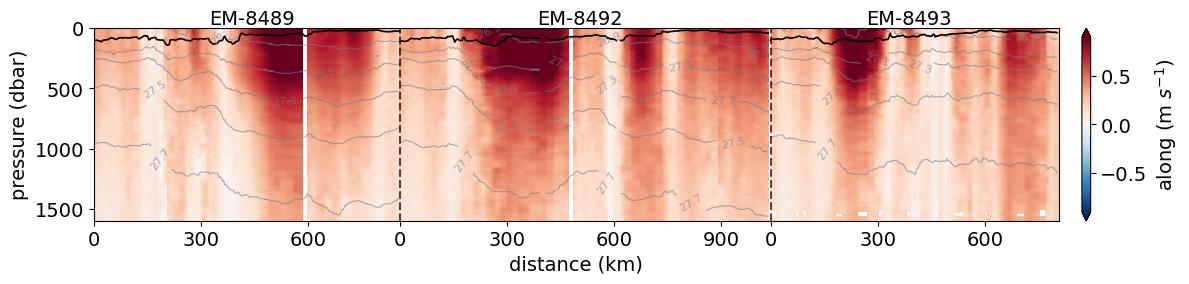

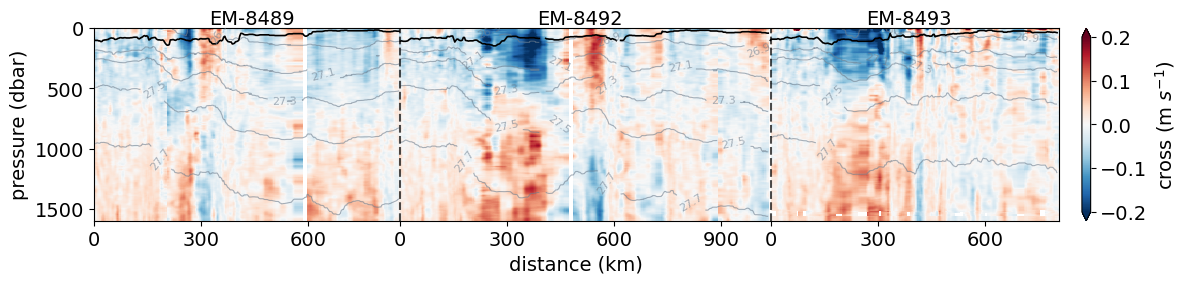

In [26]:
fig, ax = plt.subplots(figsize = (15,2.5))
im1 = u_smooth_concat.plot(x = 'distance', cmap = 'RdBu_r', vmin = -0.9, vmax = 0.9, #levels = np.arange(-0.85, 0.9, 0.05),
                                            cbar_kwargs={"label": "along (m $s^{-1}$)", 'pad': 0.02, 'extend':'both'})

for i in range(0,len(flt_dist_loc)):
    ax.axvline(x = flt_dist_loc[i], linestyle = '--', color = 'k', alpha = 0.7)
    
ax.set_xticks(ticks)
ax.set_xticklabels(values)

ax.plot(mld_on_p.distance, mld_on_p, c = 'k', linewidth = 1.2)
CS = pdens.plot.contour(x = 'distance', colors = 'slategrey', linewidths = 0.8, levels = levels, alpha = 0.6)
plt.clabel(CS, inline=True, fontsize=8, fmt = '%1.1f')

ax.invert_yaxis()
ax.set_xlabel('distance (km)')
ax.set_ylabel('pressure (dbar)')
ax.text(0.12, 1.02, 'EM-8489', transform = ax.transAxes)
ax.text(0.46, 1.02, 'EM-8492', transform = ax.transAxes)
ax.text(0.8, 1.02, 'EM-8493', transform = ax.transAxes)

# settings.save_figure(fig, my_path, 'along_vels.png', dpi = 600, pad = 0.2)


fig, ax = plt.subplots(figsize = (15,2.5))
im1 = v_smooth_concat.plot(x = 'distance', cmap = 'RdBu_r', vmin = -0.2, vmax = 0.2, # levels = np.arange(-0.2, 0.225, 0.025),
                                            cbar_kwargs={"label": "cross (m $s^{-1}$)", 'pad': 0.02, 'extend':'both'})

for i in range(0,len(flt_dist_loc)):
    ax.axvline(x = flt_dist_loc[i], linestyle = '--', color = 'k', alpha = 0.7)
    
ax.set_xticks(ticks)
ax.set_xticklabels(values)

ax.plot(mld_on_p.distance, mld_on_p, c = 'k', linewidth = 1.2)
CS = pdens.plot.contour(x = 'distance', colors = 'slategrey', linewidths = 0.8, levels = levels, alpha = 0.6)
plt.clabel(CS, inline=True, fontsize=8, fmt = '%1.1f')

ax.invert_yaxis()
ax.set_xlabel('distance (km)')
ax.set_ylabel('pressure (dbar)')
ax.text(0.12, 1.02, 'EM-8489', transform = ax.transAxes)
ax.text(0.46, 1.02, 'EM-8492', transform = ax.transAxes)
ax.text(0.8, 1.02, 'EM-8493', transform = ax.transAxes)

# settings.save_figure(fig, my_path, 'cross_vels.png', dpi = 600, pad = 0.2)

In [27]:
pdens_even_d = {}
mld_even_d = {}

pdens_prof = {}
mld_prof = {}
for floatid in floatids:
    pdens_even_d[floatid] = calc.potentialDensity(T_even_dist[floatid].pressure, S_even_dist[floatid], T_even_dist[floatid])
    mld_even_d[floatid] = calc.MLD(pdens_even_d[floatid], criteria = 0.05, pref = 10)
    
    pdens_prof[floatid] = calc.potentialDensity(ds[floatid].pressure, ds[floatid].SA, ds[floatid].CT)
    mld_prof[floatid] = calc.MLD(pdens_prof[floatid], criteria = 0.05, pref = 10)

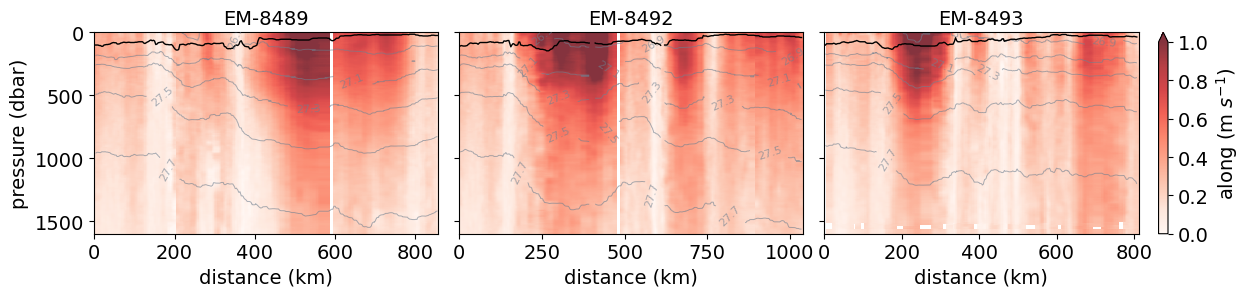

In [28]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (12, 3.2))
axs = ax.flatten()

i = 0
for floatid in floatids:
    
    im = u_smooth[floatid].plot(ax = axs[i], x = 'distance', cmap = 'Reds', vmin = 0, vmax = 1, alpha = 0.8, add_colorbar = False)
    
    mld_even_d[floatid].plot(ax = axs[i], c = 'k', linewidth = 1)
    
    CS = pdens_even_d[floatid].plot.contour(ax = axs[i], x = 'distance', colors = 'slategrey', linewidths = 0.7, 
                                            levels = levels, alpha = 0.6)
    
    axs[i].clabel(CS, inline=True, fontsize=8, fmt = '%1.1f')
    axs[i].set_ylabel('')
    axs[i].set_xlabel('distance (km)')
    axs[i].set_title(f'EM-{floatid}', fontsize = 14)
    
    i+=1

axs[0].invert_yaxis()
axs[0].set_ylabel('pressure (dbar)')

plt.tight_layout(w_pad = 0.03)

divider = make_axes_locatable(axs[2])
cax = divider.append_axes('right', size="3%", pad=0.2)
plt.colorbar(im, cax, label = 'along (m $s^{-1}$)', extend = 'max')

# settings.save_figure(fig, my_path, 'along_vels.png', dpi = 600, pad = 0.2)

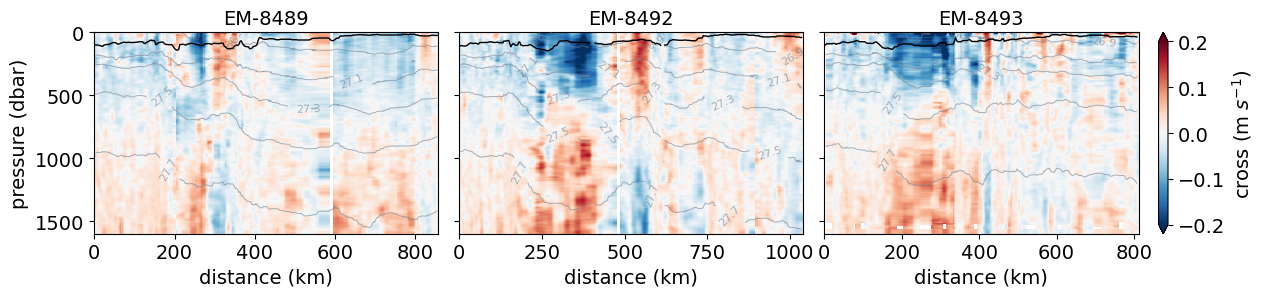

In [32]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (12, 3.2))
axs = ax.flatten()

i = 0
for floatid in floatids:
    
    im = v_smooth[floatid].plot(ax = axs[i], x = 'distance', cmap = 'RdBu_r', vmin = -0.2, vmax = 0.2, add_colorbar = False)
    
    mld_even_d[floatid].plot(ax = axs[i], c = 'k', linewidth = 1)
    
    CS = pdens_even_d[floatid].plot.contour(ax = axs[i], x = 'distance', colors = 'slategrey', linewidths = 0.7, 
                                            levels = levels, alpha = 0.6)
    
    axs[i].clabel(CS, inline=True, fontsize=8, fmt = '%1.1f')
    axs[i].set_ylabel('')
    axs[i].set_xlabel('distance (km)')
    axs[i].set_title(f'EM-{floatid}', fontsize = 14)
    
    i+=1

axs[0].invert_yaxis()
axs[0].set_ylabel('pressure (dbar)')

plt.tight_layout(w_pad = 0.03)

divider = make_axes_locatable(axs[2])
cax = divider.append_axes('right', size="3%", pad=0.2)
plt.colorbar(im, cax, label = 'cross (m $s^{-1}$)', extend = 'both')

# settings.save_figure(fig, my_path, 'cross_vels.png', dpi = 600, pad = 0.2)

### By profile

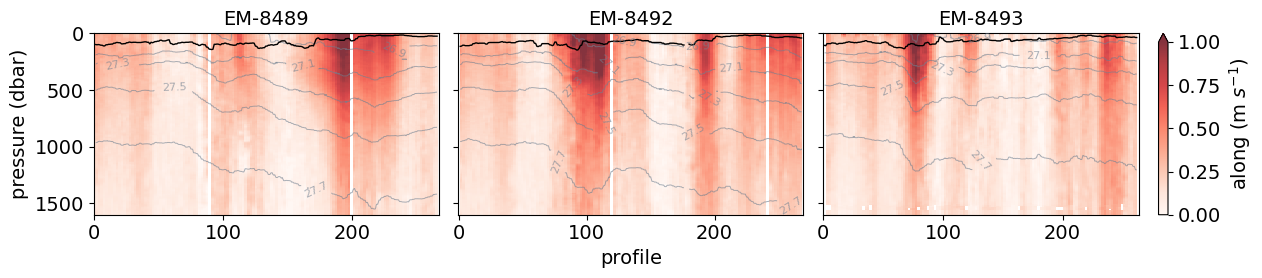

In [33]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (12, 3))
axs = ax.flatten()

i = 0
for floatid in floatids:
    
    im = u_rot_prof[floatid].plot(ax = axs[i], x = 'profile', cmap = 'Reds', vmin = 0, vmax = 1, alpha = 0.8, add_colorbar = False)
    
    mld_prof[floatid].plot(ax = axs[i], c = 'k', linewidth = 1)
    
    CS = pdens_prof[floatid].plot.contour(ax = axs[i], x = 'profile', colors = 'slategrey', linewidths = 0.7, 
                                            levels = levels, alpha = 0.6)
    
    axs[i].clabel(CS, inline=True, fontsize=8, fmt = '%1.1f')
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].set_title(f'EM-{floatid}', fontsize = 14)
    
    i+=1

axs[0].invert_yaxis()
axs[0].set_ylabel('pressure (dbar)')
axs[1].set_xlabel('profile')

plt.tight_layout(w_pad = 0.7)

divider = make_axes_locatable(axs[2])
cax = divider.append_axes('right', size="3%", pad=0.2)
plt.colorbar(im, cax, label = 'along (m $s^{-1}$)', extend = 'max')

# settings.save_figure(fig, my_path, 'cross_vels_prof.png', dpi = 600, pad = 0.2)

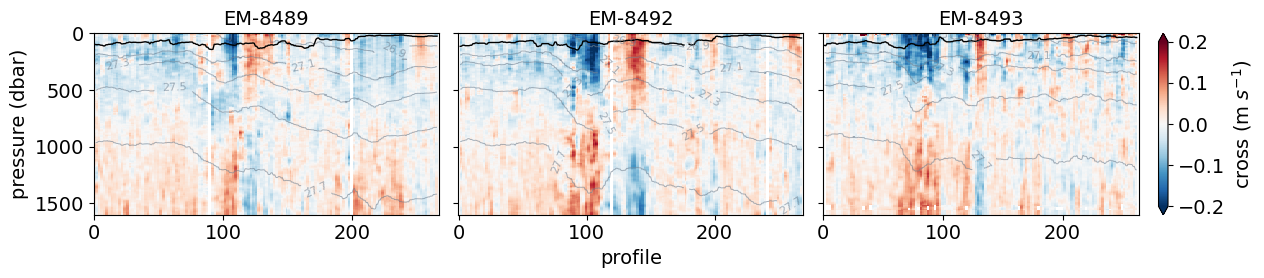

In [34]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (12, 3))
axs = ax.flatten()

i = 0
for floatid in floatids:
    
    im = v_rot_prof[floatid].plot(ax = axs[i], x = 'profile', cmap = 'RdBu_r', vmin = -0.2, vmax = 0.2, add_colorbar = False)
    
    mld_prof[floatid].plot(ax = axs[i], c = 'k', linewidth = 1)
    
    CS = pdens_prof[floatid].plot.contour(ax = axs[i], x = 'profile', colors = 'slategrey', linewidths = 0.7, 
                                            levels = levels, alpha = 0.6)
    
    axs[i].clabel(CS, inline=True, fontsize=8, fmt = '%1.1f')
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].set_title(f'EM-{floatid}', fontsize = 14)
    
    i+=1

axs[0].invert_yaxis()
axs[0].set_ylabel('pressure (dbar)')
axs[1].set_xlabel('profile')

plt.tight_layout(w_pad = 0.7)

divider = make_axes_locatable(axs[2])
cax = divider.append_axes('right', size="3%", pad=0.2)
plt.colorbar(im, cax, label = 'cross (m $s^{-1}$)', extend = 'both')

# settings.save_figure(fig, my_path, 'cross_vels_prof.png', dpi = 600, pad = 0.2)

## Individual floats

Plot the float track bearing with unsmoothed vs smoothed GPS positions. 

The bearing using smoothed GPS positions is used as a proxy for the stream direction.

In [35]:
floatid = 8492
float_num = ema[floatid]
rs = calc.findRSperiod(float_num)

lons = float_num.longitude[rs]
lats = float_num.latitude[rs]

imp.reload(vel)
u = vel.setAbsVelToNan(floatid, abs_vels[floatid].u_abs)
v = vel.setAbsVelToNan(floatid, abs_vels[floatid].v_abs)

u = vel.erroneous_rel_vels(u, floatid)
v = vel.erroneous_rel_vels(v, floatid)

In [36]:
locs = {}
locs[8489] = [(180,220), (280,320)]
locs[8492] = [(220,310),(450,500)]
locs[8493] = [(260,330),(370,400)]

Text(0, 0.5, 'pressure (dbar)')

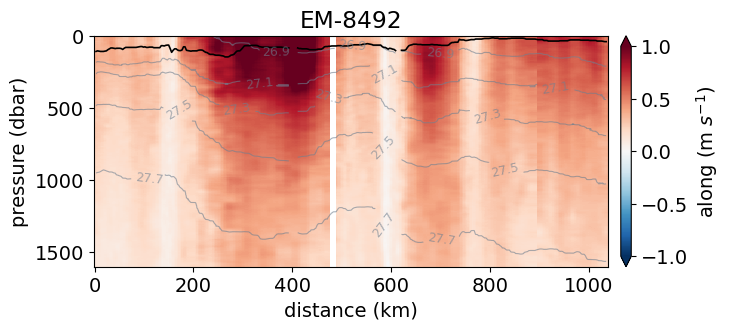

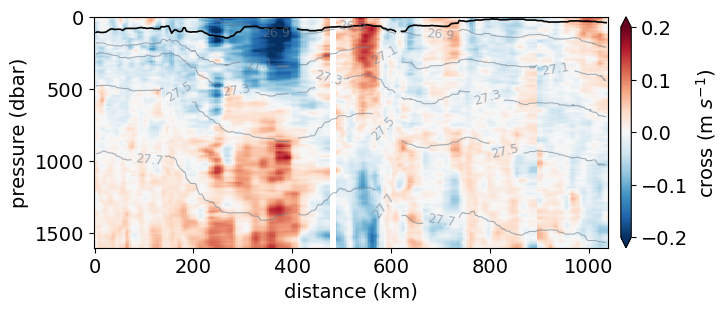

In [37]:
fig, ax = plt.subplots(figsize = (8,3))

pdens = calc.potentialDensity(S_even_dist[8492].pressure, S_even_dist[8492], T_even_dist[8492])
mld_on_p = calc.MLD(pdens, criteria = 0.05, pref = 10)

u_smooth[floatid].plot(x = 'distance', cmap = 'RdBu_r', vmin = -1, vmax = 1, 
                                            cbar_kwargs={"label": "along (m $s^{-1}$)", 'pad': 0.02, 'extend':'both'})

ax.plot(mld_on_p.distance, mld_on_p, c = 'k', linewidth = 1.2)
CS = pdens.plot.contour(x = 'distance', colors = 'slategrey', linewidths = 0.8, levels = levels, alpha = 0.6)
plt.clabel(CS, inline=True, fontsize=9, fmt = '%1.1f')

# for i in [0]:
#     d1, d2 = locs[8492][i][0], locs[8492][i][1]
#     d = T_even_dist[8492].distance.sel(distance = slice(d1,d2))
#     plt.plot(d, 0*np.arange(0, len(d))+5, c = 'k', linewidth = 7)

ax.invert_yaxis()
ax.set_xlabel('distance (km)')
ax.set_ylabel('pressure (dbar)')

plt.title('EM-8492')

# settings.save_figure(fig, my_path, 'along_8492.png', dpi = 600, pad = 0.2)


fig, ax = plt.subplots(figsize = (8,3))

pdens = calc.potentialDensity(S_even_dist[8492].pressure, S_even_dist[8492], T_even_dist[8492])
mld_on_p = calc.MLD(pdens, criteria = 0.05, pref = 10)

v_smooth[floatid].plot(x = 'distance', cmap = 'RdBu_r', vmin = -0.2, vmax = 0.2, 
                                            cbar_kwargs={"label": "cross (m $s^{-1}$)", 'pad': 0.02, 'extend':'both'})

ax.plot(mld_on_p.distance, mld_on_p, c = 'k', linewidth = 1.2)
CS = pdens.plot.contour(x = 'distance', colors = 'slategrey', linewidths = 0.8, levels = levels, alpha = 0.6)
plt.clabel(CS, inline=True, fontsize=9, fmt = '%1.1f')

# for i in [0]:
#     d1, d2 = locs[8492][i][0], locs[8492][i][1]
#     d = T_even_dist[8492].distance.sel(distance = slice(d1,d2))
#     plt.plot(d, 0*np.arange(0, len(d))+5, c = 'k', linewidth = 7)

ax.invert_yaxis()
ax.set_xlabel('distance (km)')
ax.set_ylabel('pressure (dbar)')

# settings.save_figure(fig, my_path, 'cross_8492.png', dpi = 600, pad = 0.2)

In [38]:
brng_lats, brng_lons = rot_vels[floatid].brng_lats, rot_vels[floatid].brng_lons

#previously used smoothed lat and lon positions
lon_smooth = interp.gaussianFilter(lons, window = 9, interp_na = True)[rs]
lat_smooth = interp.gaussianFilter(lats, window = 9, interp_na = True)[rs]

Text(0.5, 1.0, 'profile 110-115')

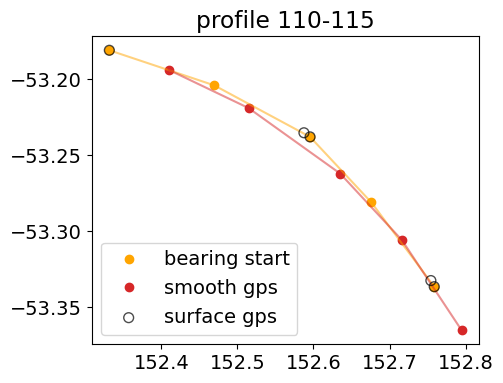

In [39]:
prof1, prof2 = 110,115

fig, ax = plt.subplots(figsize = (5,4))
plt.scatter(lons[prof1:prof2], lats[prof1:prof2], facecolors = 'none', s = 50,
            edgecolors = 'k', linewidths = 1, alpha = 0.7, zorder = 4)

plt.plot(brng_lons[prof1:prof2], brng_lats[prof1:prof2], 'o', c = 'orange')
plt.plot(lon_smooth[prof1:prof2], lat_smooth[prof1:prof2], 'o', c = 'tab:red')
plt.legend(['bearing start','smooth gps', 'surface gps'])

plt.plot(brng_lons[prof1:prof2], brng_lats[prof1:prof2], c = 'orange', alpha = 0.5)
plt.plot(lon_smooth[prof1:prof2], lat_smooth[prof1:prof2], c = 'tab:red', alpha = 0.5)

plt.title(f'profile {prof1}-{prof2}')

In [40]:
along_stream, brng_lats, brng_lons = vel.floatTrackBearing(floatid, float_num.latitude[rs], 
                                                           float_num.longitude[rs], 
                                                           ctd_time[floatid], u, v)

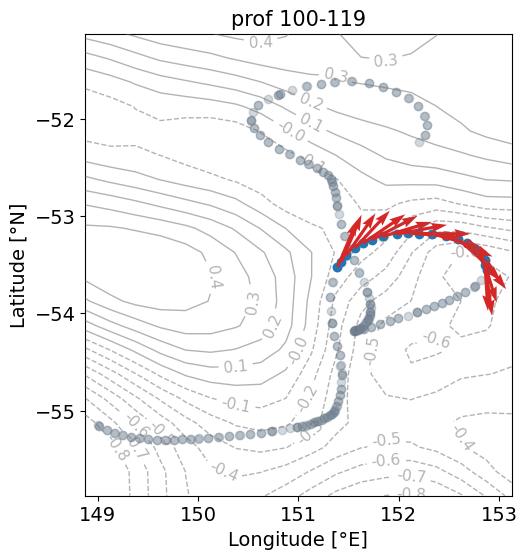

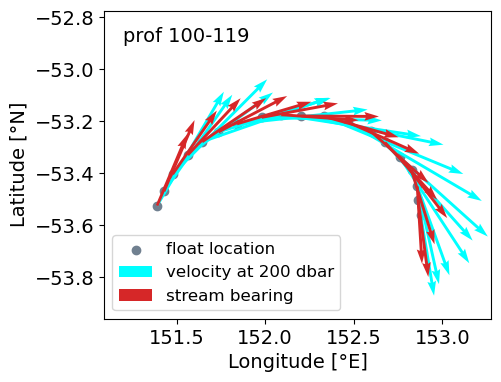

In [41]:
imp.reload(vel)

prof1 = 100
prof2 = 119
fig, fig2 = vel.plot_along_strm_dir(float_num, along_stream, brng_lats, brng_lons, alt_cmems, 
                                    prof1, prof2, u = u, v = v, scale = 2)

In [37]:
# settings.save_figure(fig, my_path, 'stream_bearing_8492.png', dpi = 600, pad = 0.2)
# settings.save_figure(fig2, my_path, 'stream_bearing_8492_100_1196.png', dpi = 600, pad = 0.2)

In [145]:
# settings.save_figure(fig, my_path, 'stream_bearing_8489.png', dpi = 600, pad = 0.2)
# settings.save_figure(fig2, my_path, 'stream_bearing_8489_90_126.png', dpi = 600, pad = 0.2)

### Mid-point float positions in each profile

In [42]:
imp.reload(vel)

mid_lat = []
mid_lon = []
for prof in range(0, len(lons)):
    lt, ln = vel.location_at_middepth(lats, lons, ctd_time[floatid], prof, u, v)
    mid_lat.append(lt)
    mid_lon.append(ln)
    
mid_lat = np.asarray(mid_lat)
mid_lon = np.asarray(mid_lon)

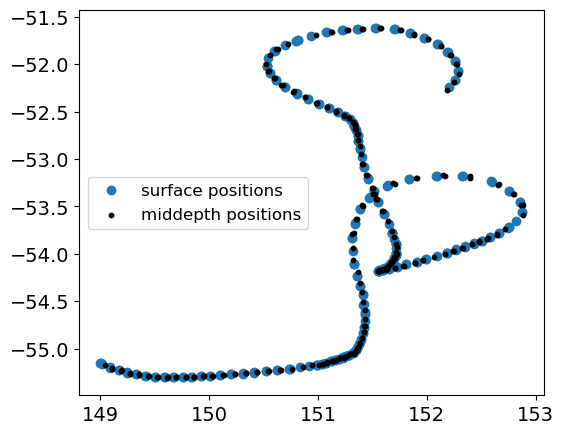

In [48]:
fig, ax = plt.subplots(figsize = (6, 5))
plt.plot(lons, lats, 'o')
plt.scatter(mid_lon, mid_lat, c = 'k', s = 10, zorder = 5)

plt.legend(['surface positions','middepth positions'], fontsize = 12)